In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('census_income.csv')
print(raw_df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
# renaming columns for better accessibility
renamed_col_df = raw_df.copy()
renamed_col_df.rename(columns={
    'education.num':'education_num',
    'marital.status':'marital_status',
    'capital.gain':'capital_gain',
    'capital.loss':'capital_loss',
    'hours.per.week':'hours_per_week',
    'native.country':'native_country'}, inplace=True)

print(renamed_col_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [4]:
# overview of the raw data
print(renamed_col_df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [5]:
# handling missing data by dropping the rows that contain them

# replace "?" with true null
for col in renamed_col_df.columns:
  renamed_col_df[col].replace("?", np.nan, inplace=True)

# drop rows with missing data
missing_dropped_df = renamed_col_df.dropna(axis=0)

print(f"Length of dataset before dropping: {len(renamed_col_df)}")
print(f"Length of dataset after dropping: {len(missing_dropped_df)}")
print(f"Percentage of missing data: {( (len(renamed_col_df) - len(missing_dropped_df)) / len(renamed_col_df)) * 100}")

Length of dataset before dropping: 32561
Length of dataset after dropping: 30162
Percentage of missing data: 7.367709836921471


In [ ]:
# looking at the distribution of data

categorical_cols = list(missing_dropped_df.select_dtypes(include=['object']).columns)
for col in categorical_cols:
  sns.countplot(x=col, data=missing_dropped_df, color="blue", order=missing_dropped_df[col].value_counts().index)
  plt.xticks(rotation=90)
  plt.show()
  

In [ ]:
numerical_cols = list(missing_dropped_df.select_dtypes(include=['number']).columns)
for col in numerical_cols:
  sns.boxplot(x=missing_dropped_df[col])
  plt.show()

In [8]:
# check for duplicate rows and remove them

duplicate_rows = missing_dropped_df[missing_dropped_df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

removed_duplicate_df = missing_dropped_df.drop_duplicates()
print(f"Number of duplicate rows after removal: {len(removed_duplicate_df[removed_duplicate_df.duplicated()])}")

Number of duplicate rows: 23
Number of duplicate rows after removal: 0


In [9]:
# dropping features

cols_to_drop = ['capital_gain', 'capital_loss', 'education']
dropped_cols_df = removed_duplicate_df.drop(cols_to_drop, axis=1)
print(dropped_cols_df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'hours_per_week',
       'native_country', 'income'],
      dtype='object')


In [10]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoded_df = dropped_cols_df.copy()

encoder = LabelEncoder()
for col in dropped_cols_df.columns:
  if dropped_cols_df[col].dtype == 'object':
    encoded_df[col] = encoder.fit_transform(dropped_cols_df[col])

print(encoded_df.dtypes)

age               int64
workclass         int64
fnlwgt            int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object


In [11]:
encoded_df['income'].value_counts()

income
0    22633
1     7506
Name: count, dtype: int64

In [12]:
# min-max normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)
print(scaled_df.head())

        age  workclass    fnlwgt  education_num  marital_status  occupation  \
0  0.890411   0.333333  0.080970       0.533333        1.000000    0.230769   
1  0.506849   0.333333  0.086061       0.200000        0.000000    0.461538   
2  0.328767   0.333333  0.170568       0.600000        0.833333    0.692308   
3  0.232877   0.333333  0.138072       0.533333        0.000000    0.538462   
4  0.287671   0.333333  0.093024       0.333333        0.833333    0.000000   

   relationship  race  sex  hours_per_week  native_country  income  
0           0.2   1.0  0.0        0.173469            0.95     0.0  
1           0.8   1.0  0.0        0.397959            0.95     0.0  
2           0.6   1.0  0.0        0.397959            0.95     0.0  
3           0.8   1.0  0.0        0.448980            0.95     0.0  
4           0.8   1.0  1.0        0.397959            0.95     0.0  


In [13]:
scaled_df['income'].value_counts()

income
0.0    22633
1.0     7506
Name: count, dtype: int64

In [14]:
scaled_df.columns[-1]

'income'

In [15]:
# outlier removal

def rm_outliers(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_limit = q1-(1.5*iqr)
    upper_limit = q3+(1.5*iqr)

    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
  
  return df

cols_to_check = scaled_df.columns[:-1]
outliers_removed_df = rm_outliers(scaled_df, cols_to_check)

outliers_removed_df.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
count,11687.000000,1.168700e+04,11687.000000,11687.000000,11687.000000,11687.000000,11687.000000,11687.0,11687.000000,11687.000000,1.168700e+04,11687.000000
mean,0.275508,3.333333e-01,0.112245,0.604153,0.411996,0.430932,0.263678,1.0,0.696244,0.415165,9.500000e-01,0.240524
std,0.159298,5.595763e-14,0.057998,0.117236,0.248776,0.320832,0.311029,0.0,0.459898,0.040337,9.592737e-14,0.427420
min,0.000000,3.333333e-01,0.003439,0.333333,0.000000,0.000000,0.000000,1.0,0.000000,0.326531,9.500000e-01,0.000000
25%,0.150685,3.333333e-01,0.070291,0.533333,0.333333,0.153846,0.000000,1.0,0.000000,0.397959,9.500000e-01,0.000000
50%,0.260274,3.333333e-01,0.110485,0.600000,0.333333,0.384615,0.200000,1.0,1.000000,0.397959,9.500000e-01,0.000000
75%,0.383562,3.333333e-01,0.143516,0.666667,0.666667,0.692308,0.600000,1.0,1.000000,0.438776,9.500000e-01,0.000000
max,0.794521,3.333333e-01,0.273959,0.800000,1.000000,1.000000,1.000000,1.0,1.000000,0.520408,9.500000e-01,1.000000


In [16]:
print(f"Length of data before outlier removal: {len(scaled_df)}")
print(f"Length of data after outlier removal: {len(outliers_removed_df)}")

Length of data before outlier removal: 30139
Length of data after outlier removal: 11687


In [17]:
# split data into features and target

final_df = outliers_removed_df.copy()

features = final_df.iloc[:, :-1]
target = final_df.iloc[:, 11]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  features, 
  target, 
  test_size=0.2, 
  random_state=42,
  stratify=target)

print(f"Size of X_train: {len(X_train)}")
print(f"Size of X_test: {len(X_test)}")
print(f"Size of y_train: {len(y_train)}")
print(f"Size of y_test: {len(y_test)}")

Size of X_train: 9349
Size of X_test: 2338
Size of y_train: 9349
Size of y_test: 2338


In [18]:
y_train.value_counts()

income
0.0    7100
1.0    2249
Name: count, dtype: int64

In [19]:
y_test.value_counts()

income
0.0    1776
1.0     562
Name: count, dtype: int64

Decision Tree


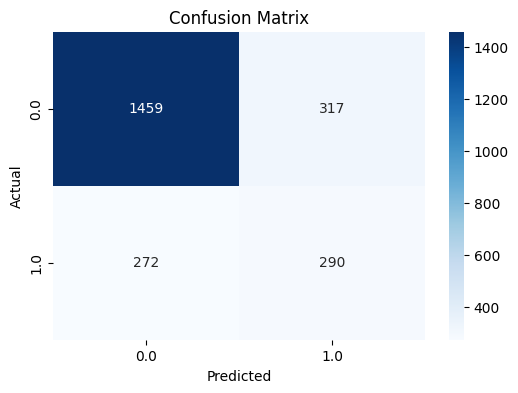

<Figure size 640x480 with 0 Axes>

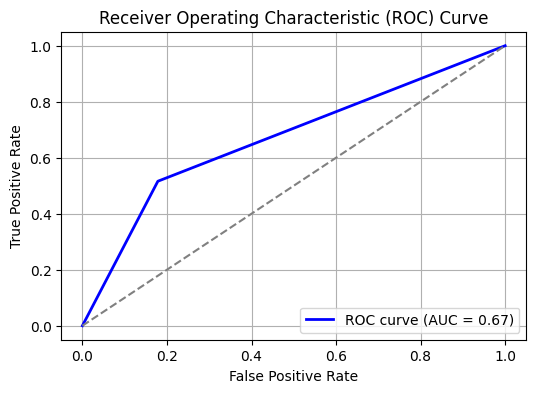

Accuracy: 74.81
Precision: 75.51
Recall: 74.81
F1: 75.13
RandomForestClassifier


<Figure size 640x480 with 0 Axes>

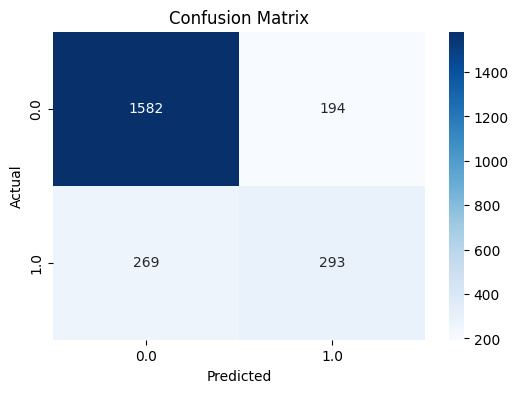

<Figure size 640x480 with 0 Axes>

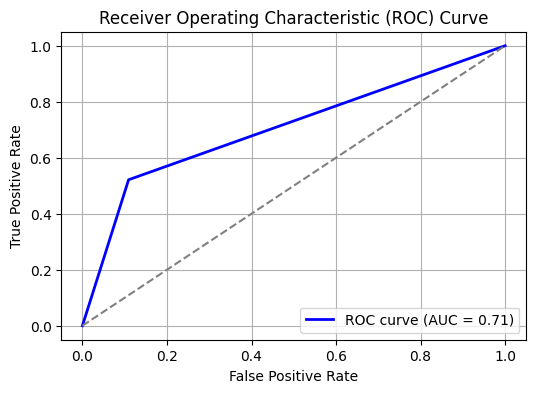

Accuracy: 80.2
Precision: 79.39
Recall: 80.2
F1: 79.69
Logistic Regression Classifier


<Figure size 640x480 with 0 Axes>

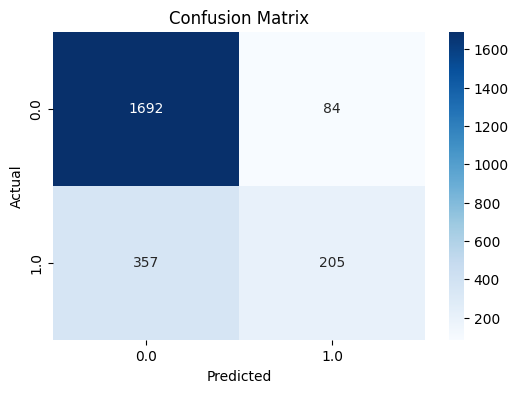

<Figure size 640x480 with 0 Axes>

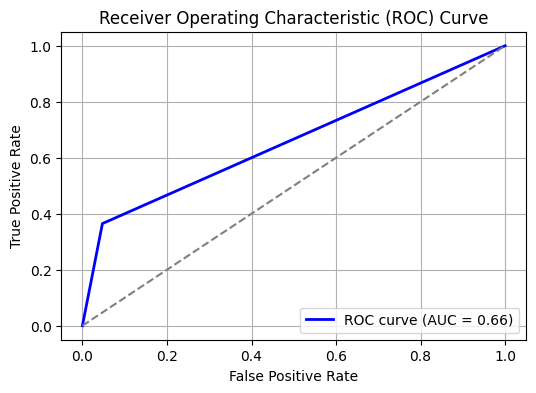

Accuracy: 81.14
Precision: 79.78
Recall: 81.14
F1: 78.79
Gaussian Naive Bayes


<Figure size 640x480 with 0 Axes>

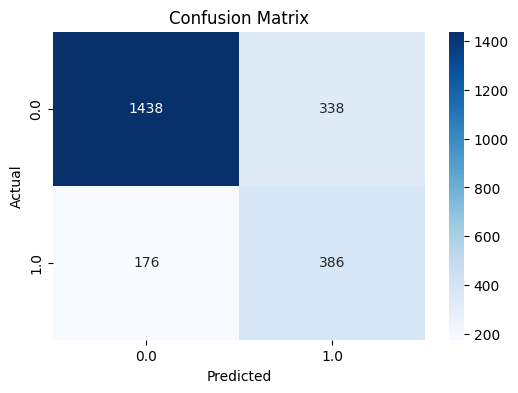

<Figure size 640x480 with 0 Axes>

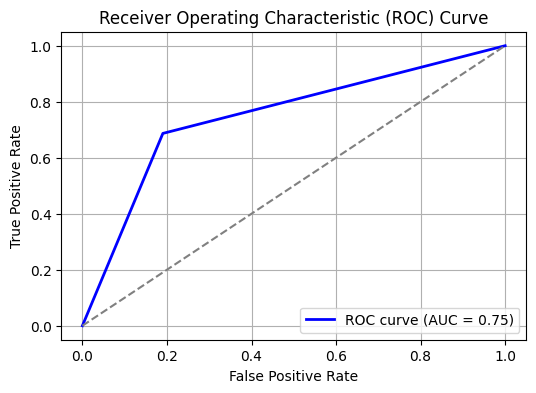

Accuracy: 78.02
Precision: 80.49
Recall: 78.02
F1: 78.87
k-Neighbors Classifier


<Figure size 640x480 with 0 Axes>

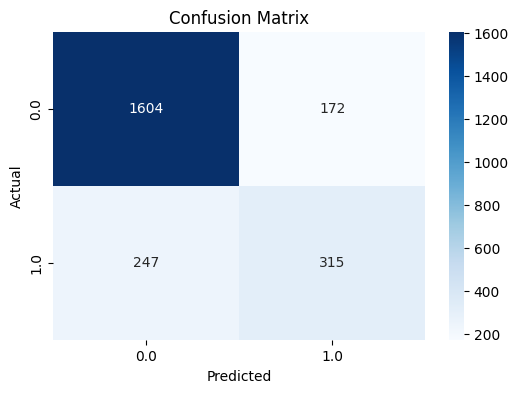

<Figure size 640x480 with 0 Axes>

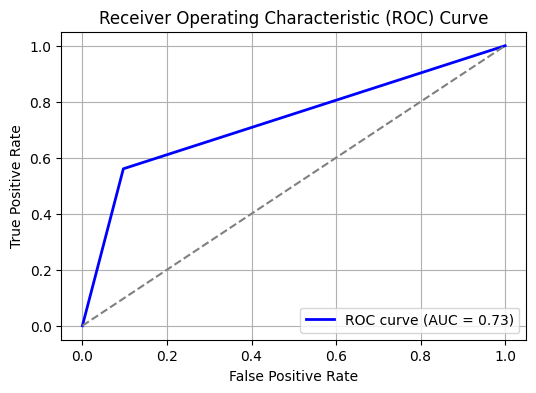

Accuracy: 82.08
Precision: 81.37
Recall: 82.08
F1: 81.62
Gradient Boosting Classifier


<Figure size 640x480 with 0 Axes>

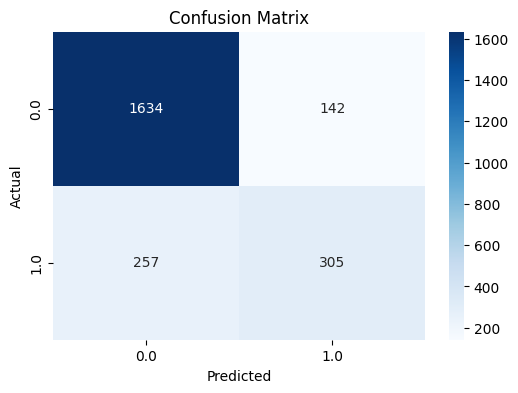

<Figure size 640x480 with 0 Axes>

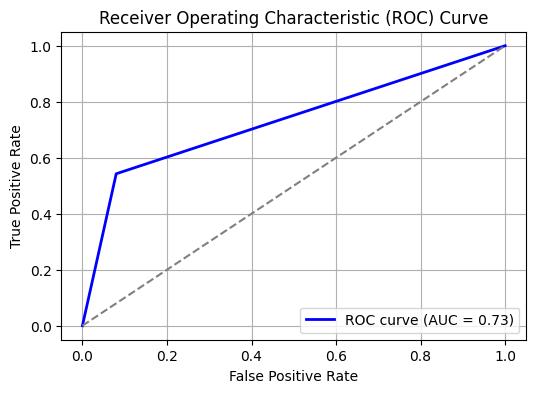

Accuracy: 82.93
Precision: 82.04
Recall: 82.93
F1: 82.23


<Figure size 640x480 with 0 Axes>

In [20]:
# model predictions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.utils.multiclass import unique_labels

FIGSIZE = (6,4)

# function to do prediction
def model_predict(model, X_train, y_train, X_test, y_test):
  
  def plt_conf_matrix(conf_matrix, class_labels):
    plt.figure(figsize=FIGSIZE)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
                xticklabels=class_labels, yticklabels=class_labels)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.clf()
  
  def plt_roc(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=FIGSIZE)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    plt.clf()
      
  match model:
    case "DT":
      print("Decision Tree")
      clf = DecisionTreeClassifier()
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
    
    case "RFC":
      print("RandomForestClassifier")
      clf = RandomForestClassifier()
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
    
    case "LRC":
      print("Logistic Regression Classifier")
      clf = LogisticRegression()
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
      
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
    
    case "GNB":
      print("Gaussian Naive Bayes")
      clf = GaussianNB()
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
        
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
      
    case "KNN":
      print("k-Neighbors Classifier")
      clf = KNeighborsClassifier(n_neighbors=13)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
      
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
      
    case "GBC":
      print("Gradient Boosting Classifier")
      clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      class_labels = unique_labels(y_test, y_pred)
      
      plt_conf_matrix(conf_matrix, class_labels)
      plt_roc(y_test, y_pred)
      
      print(f"Accuracy: {round( (accuracy_score(y_test, y_pred)*100),2)}")
      print(f"Precision: {round( (precision_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"Recall: {round( (recall_score(y_test, y_pred, average='weighted')*100),2)}")
      print(f"F1: {round( (f1_score(y_test, y_pred, average='weighted')*100),2)}")
      
model_predict("DT", X_train, y_train, X_test, y_test)
model_predict("RFC", X_train, y_train, X_test, y_test)
model_predict("LRC", X_train, y_train, X_test, y_test)
model_predict("GNB", X_train, y_train, X_test, y_test)
model_predict("KNN", X_train, y_train, X_test, y_test)
model_predict("GBC", X_train, y_train, X_test, y_test)

In [22]:
# Extra EDA

final_df.describe()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
count,11687.000000,1.168700e+04,11687.000000,11687.000000,11687.000000,11687.000000,11687.000000,11687.0,11687.000000,11687.000000,1.168700e+04,11687.000000
mean,0.275508,3.333333e-01,0.112245,0.604153,0.411996,0.430932,0.263678,1.0,0.696244,0.415165,9.500000e-01,0.240524
std,0.159298,5.595763e-14,0.057998,0.117236,0.248776,0.320832,0.311029,0.0,0.459898,0.040337,9.592737e-14,0.427420
min,0.000000,3.333333e-01,0.003439,0.333333,0.000000,0.000000,0.000000,1.0,0.000000,0.326531,9.500000e-01,0.000000
25%,0.150685,3.333333e-01,0.070291,0.533333,0.333333,0.153846,0.000000,1.0,0.000000,0.397959,9.500000e-01,0.000000
50%,0.260274,3.333333e-01,0.110485,0.600000,0.333333,0.384615,0.200000,1.0,1.000000,0.397959,9.500000e-01,0.000000
75%,0.383562,3.333333e-01,0.143516,0.666667,0.666667,0.692308,0.600000,1.0,1.000000,0.438776,9.500000e-01,0.000000
max,0.794521,3.333333e-01,0.273959,0.800000,1.000000,1.000000,1.000000,1.0,1.000000,0.520408,9.500000e-01,1.000000


In [23]:
missing_dropped_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
raw_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [26]:
removed_duplicate_df['education'].value_counts()

education
HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: count, dtype: int64

In [30]:
removed_duplicate_df[['education', 'income']].head()

,education,income
1,HS-grad,<=50K
3,7th-8th,<=50K
4,Some-college,<=50K
5,HS-grad,<=50K
6,10th,<=50K


In [31]:
removed_duplicate_df.groupby('education')['income'].value_counts()

education     income
10th          <=50K      761
              >50K        59
11th          <=50K      989
              >50K        59
12th          <=50K      348
              >50K        29
1st-4th       <=50K      143
              >50K         6
5th-6th       <=50K      275
              >50K        12
7th-8th       <=50K      521
              >50K        35
9th           <=50K      430
              >50K        25
Assoc-acdm    <=50K      752
              >50K       256
Assoc-voc     <=50K      963
              >50K       344
Bachelors     <=50K     2916
              >50K      2126
Doctorate     >50K       280
              <=50K       95
HS-grad       <=50K     8218
              >50K      1616
Masters       >50K       918
              <=50K      708
Preschool     <=50K       44
Prof-school   >50K       406
              <=50K      136
Some-college  <=50K     5334
              >50K      1335
Name: count, dtype: int64

In [32]:
removed_duplicate_df['age'].describe()

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [39]:
bins = [15, 25, 35, 45, 55, 65]
removed_duplicate_df['age_category'] = pd.cut(removed_duplicate_df['age'], bins=bins, labels=['15-24', '25-34', '35-44', '45-54', '55 and older'])

grouped = removed_duplicate_df.groupby('age_category')['income'].value_counts()
print(grouped)

age_category  income
15-24         <=50K     5546
              >50K       111
25-34         <=50K     6527
              >50K      1540
35-44         <=50K     4980
              >50K      2701
45-54         <=50K     3168
              >50K      2129
55 and older  <=50K     1763
              >50K       836
Name: count, dtype: int64


/tmp/ipykernel_146/479065903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_duplicate_df['age_category'] = pd.cut(removed_duplicate_df['age'], bins=bins, labels=['15-24', '25-34', '35-44', '45-54', '55 and older'])


In [41]:
removed_duplicate_df['native_country_cat'] = np.where(removed_duplicate_df['native_country'] == 'United-States', 'US', 'Other')

removed_duplicate_df.groupby('native_country_cat')['income'].value_counts()

/tmp/ipykernel_146/3455677731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_duplicate_df['native_country_cat'] = np.where(removed_duplicate_df['native_country'] == 'United-States', 'US', 'Other')


native_country_cat  income
Other               <=50K      2139
                    >50K        513
US                  <=50K     20494
                    >50K       6993
Name: count, dtype: int64

In [40]:
removed_duplicate_df['native_country'].value_counts()

native_country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      